# Quadratic Residue

In [3]:
import setup
from circuits import * 
import sympy as sp

In [4]:
def residues(n):
    v = []
    res = np.zeros(n)
    for i in range(n):
        if(np.gcd(i,n) == 1):
            #print(i, i**2 % n)
            res[i**2 % n] += 1
            v.append(i**2 % n)
    return res, np.sort(np.array(list(set(v))))

In [5]:
def is_prime(n):
  if n == 2 or n == 3: return True
  if n < 2 or n%2 == 0: return False
  if n < 9: return True
  if n%3 == 0: return False
  r = int(n**0.5)
  # since all primes > 3 are of the form 6n ± 1
  # start with f=5 (which is prime)
  # and test f, f+2 for being prime
  # then loop by 6. 
  f = 5
  while f <= r:
    #print('\t',f)
    if n % f == 0: return False
    if n % (f+2) == 0: return False
    f += 6
  return True    

In [126]:
def coprimes(n):
    cps = []
    for i in range(n):
        if(np.gcd(i,n)==1):
            cps.append(i)
    return cps

def pol2cart(rho, phi):
    y = rho * np.cos(phi)
    x = rho * np.sin(phi)
    return(x, y)

def dlp(reses, n):
    dlps = coprimes(n)
    
    dlps = [[dlp] + ["green"] if (dlp in reses) else [dlp] + ["red"] for dlp in dlps]

    dlps_order,  _ = list(zip(*dlps))

    coords_labels = [[pol2cart(1, (dlp[0]-1)*np.pi*2/(n-1)), dlp[1], dlp[0]] for dlp in dlps]
    
    coords, labels, labels_2 = list(zip(*coords_labels))    
    
    dlp_plot(coords, labels, labels_2, title=r"QRP: $\mathbb{{Z}}^{{*}}_{{{p}}}$".format(p=n))
    
def dlp_plot(coords, labels, labels_2, diameter=None, title=None):
    circle1 = plt.Circle((0, 0), 1, facecolor= 'none', edgecolor='black', linewidth=3, zorder=0)

    
    fig, ax = plt.subplots(figsize=(5,5)) 

    if(diameter):
        plt.plot(*list(zip(*diameter)), color='black', linewidth=3)
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)

    ax.add_patch(circle1)
    
    xs, ys = list(zip(*coords))

    plt.scatter(xs, ys, color=labels, linewidth=3,zorder =5)
    [plt.annotate(str(j), xy=1.2*np.array(coords[i-1]), ha="center", va="center") for i,j in zip(range(1,len(xs)+1), labels_2)]
    plt.axis('off')
    
    plt.title(title, fontsize=20, loc='left')
    
    plt.savefig("./images/DLP/" + ''.join(e for e in title if e.isalnum()) + ".pdf",  bbox_inches='tight')
    
    plt.show()

In [127]:
primes = [i for i in range(10,10**3) if is_prime(i)]

In [128]:
primes[40]

197

In [129]:
primes[45]

229

In [130]:
p = primes[50]
q = primes[55]

In [131]:
p = primes[5]
q = primes[10]

In [132]:
# Sizeable number with two primes satisfying 2**11 - 1
p = primes[4]
q = primes[19]

In [133]:
p = 3
q = 5

In [134]:
n = p*q

In [135]:
n

15

# Troubleshooting

In [136]:
sp.totient(n)/n

0.5333333333333333

In [137]:
res, v = residues(n)

In [138]:
sum(res)/4

2.0

In [640]:
nqrs = int(((p-1)*(q-1))/4)

In [611]:
len(res[1:])

2046

In [641]:
for i in range(len(v)):
    if(sum(np.sort(v*v[i] % n) - (v % n)) != 0):
        print(i, "what the...")
        break

In [642]:
len(v)

2

In [643]:
idx = []
vals = [] 
for i in range(1,n):
    idx.append(i)
    vals.append(np.sum(np.abs(np.sign(np.sort(v*i % n) - v))))

In [644]:
idx = np.array(idx)
vals = np.array(vals)/nqrs

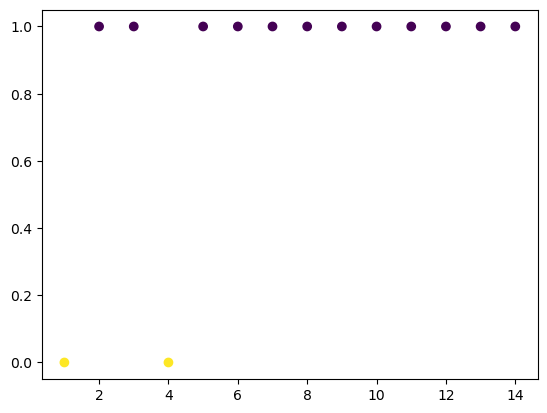

In [645]:
plt.scatter(idx,vals, c = res[1:])

In [617]:
np.nonzero((vals < 0.4) & (vals > 0.2))[0][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
vals[36108]

0.33359375

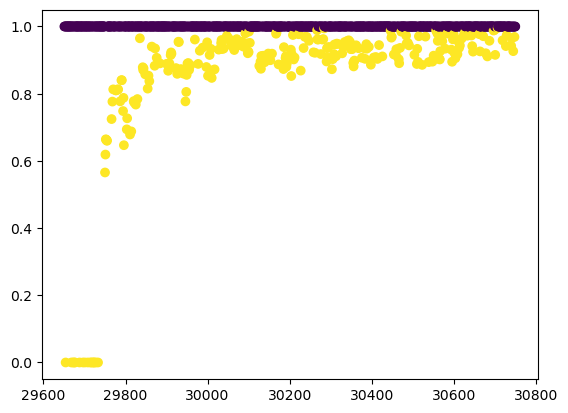

In [ ]:
plt.scatter(idx[v[7376]-100:v[7376]+1000],vals[v[7376]-100:v[7376]+1000], c=res[1:][v[7376]-100:v[7376]+1000])

In [ ]:
vals[36108]

0.33359375

In [ ]:
v[7376]

29750

In [ ]:
res[v[7376]]

4.0

In [450]:
len(set(np.sort(v*v[7376] % n)))

IndexError: index 7376 is out of bounds for axis 0 with size 322

In [451]:
len(v)

322

In [ ]:
set(v) - set(np.sort(v*v[7376] % n)) 

{3854,
 12717,
 16571,
 21118,
 25434,
 29519,
 42236,
 42467,
 50637,
 50868,
 59038,
 71986}

In [ ]:
set(np.sort(v*v[7376] % n)) - set(v) 

{7062, 15463, 19779, 23864, 36581, 44982, 45213, 66331, 70416}

In [461]:
# erroneous values? 
set(np.sort(v*v[7376] % n)) - set(v)

{7062, 15463, 19779, 23864, 36581, 44982, 45213, 66331, 70416}

In [467]:
for i in range(1, n):
    if(i**2 % n == 7062):
        print(i)

In [474]:
for j in v:
    if(j*v[7376] % n == 7062):
        print(j)

72215


C:\Users\irnam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in long_scalars
  


In [495]:
for i in set(np.sort(v*v[7376] % n)) - set(v): print(np.where(v*v[7376] % n == i))

(array([17917], dtype=int64),)
(array([17912], dtype=int64),)
(array([17915], dtype=int64),)
(array([17910], dtype=int64),)
(array([17911], dtype=int64),)
(array([17918], dtype=int64),)
(array([17914], dtype=int64),)
(array([17913], dtype=int64),)
(array([17916], dtype=int64),)


In [497]:
np.where(v*v[7376] % n == 7062)

(array([17918], dtype=int64),)

In [503]:
v[17918]*v[7376] % n

C:\Users\irnam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in long_scalars
  """Entry point for launching an IPython kernel.


7062

In [506]:
v[17918]*v[17917] % n in v

C:\Users\irnam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in long_scalars
  """Entry point for launching an IPython kernel.


False

In [479]:
v[7376]*j

C:\Users\irnam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in long_scalars
  """Entry point for launching an IPython kernel.


-2146541296

In [472]:
for j in v:
    flag = 0
    for i in range(1, n):
        if(i**2 % n == j):
            flag = 1
    assert(flag)
    

KeyboardInterrupt: 

In [459]:
len(v)

17920

In [550]:
def coprimes(n):
    cps = []
    for i in range(n):
        if(np.gcd(i,n)==1):
            cps.append(i)
    return cps

def pol2cart(rho, phi):
    y = rho * np.cos(phi)
    x = rho * np.sin(phi)
    return(x, y)

def dlp(reses, n):
    dlps = coprimes(n)
    
    dlps = [[dlp] + ["green"] if (dlp in reses) else [dlp] + ["red"] for dlp in dlps]

    dlps_order,  _ = list(zip(*dlps))

    coords_labels = [[pol2cart(1, (dlp[0]-1)*np.pi*2/(n-1)), dlp[1]] for dlp in dlps]
    
    coords, labels = list(zip(*coords_labels))    
    
    dlp_plot(coords, labels, title=r"$\mathbb{{Z}}^{{*}}_{{{p}}}$".format(p=p))
    
def dlp_plot(coords, labels, diameter=None, title=None):
    circle1 = plt.Circle((0, 0), 1, facecolor= 'none', edgecolor='black', linewidth=3, zorder=0)

    
    fig, ax = plt.subplots(figsize=(5,5)) 

    if(diameter):
        plt.plot(*list(zip(*diameter)), color='black', linewidth=3)
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)

    ax.add_patch(circle1)
    
    xs, ys = list(zip(*coords))

    plt.scatter(xs, ys, color=labels, linewidth=3,zorder =5)
    #[plt.annotate(str(i), xy=1.2*np.array(coords[i-1]), ha="center", va="center") for i in range(1,len(xs)+1)]
    plt.axis('off')
    
    plt.title(title, fontsize=20, loc='left')
    
    #plt.savefig("./images/DLP/" + ''.join(e for e in title if e.isalnum()) + ".pdf",  bbox_inches='tight')
    
    plt.show()

In [541]:
n

1363

In [542]:
len(coprimes(n))

1288

In [543]:
n

1363

In [545]:
n

1363

In [546]:
len(coprimes(n))

1288

In [619]:
len(v)

484

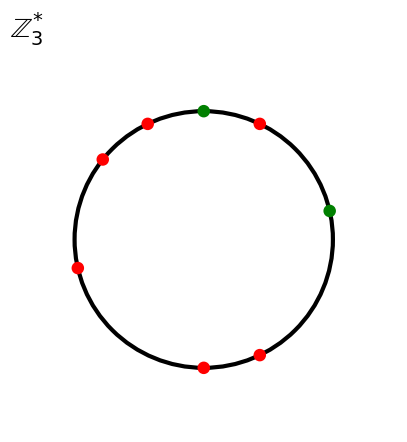

In [646]:
dlp(v, n)

# $n = p_5 \times p_{10}$

In [621]:
res, v = residues(n)

In [622]:
idx = []
vals = [] 
for i in range(1,n):
    idx.append(i)
    vals.append(np.sum(np.abs(np.sign(np.sort(v*i % n) - v))))

In [623]:
idx = np.array(idx)
vals = np.array(vals)/nqrs

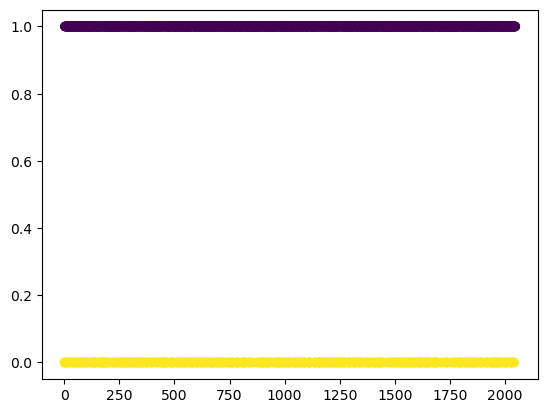

In [624]:
plt.scatter(idx,vals, c = res[1:])

# Brute Force: Proof of concept

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
p = primes[5]
q = primes[10]

In [141]:
n = 5*7

In [142]:
_, res = residues(n)

In [143]:
dataset = [(i, 1) if i in res else (i, -1) for i in coprimes(n)]

In [144]:
dataset = np.array(list(zip(*dataset)))

In [145]:
X, y = dataset[0], dataset[1]

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [147]:
sum(y_train == 1)/len(y_train)

0.1875

In [148]:
sum(y_test == 1)/len(y_test)

0.375

In [149]:
((p-1)*(q-1)/4)/n

9.2

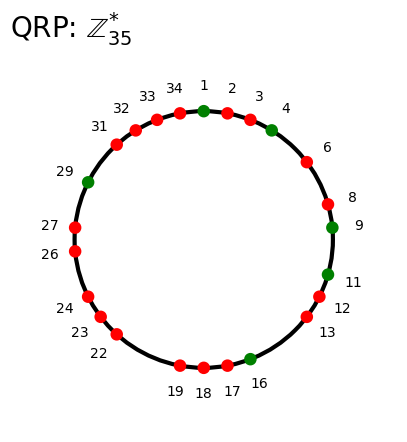

In [150]:
dlp(res, n)

In [115]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [116]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [117]:
# Linear SVC
clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.744131455399061

In [118]:
# # Nonlinear SVC
# clf = svm.NuSVC(gamma="auto")
# clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

In [119]:
# Logistic Regression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.744131455399061

In [120]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,), random_state=10, max_iter=3000000).fit(X_train, y_train)
clf.score(X_test, y_test)

0.744131455399061

In [121]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=200, random_state=0)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.5821596244131455

In [139]:
from sklearn.svm import SVC

In [142]:
def _brute_kernel(x1,x2):
    if ((x1 in res) == (x2 in res)):
        return 1
    else:
        return 0 
    
def brute_kernel(X, Y):
    K = np.zeros((X.shape[0], Y.shape[0]))
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            K[i][j] = _brute_kernel(X[i], Y[j])
    
    return K

In [143]:
len(X_train)*len(X_train)

743044

In [145]:
X_train_sorted = pd.DataFrame(X_train).reindex(pd.Series.sort_values(pd.Series(y_train)).index)

In [146]:
K = brute_kernel(X_train_sorted.to_numpy(), X_train_sorted.to_numpy())

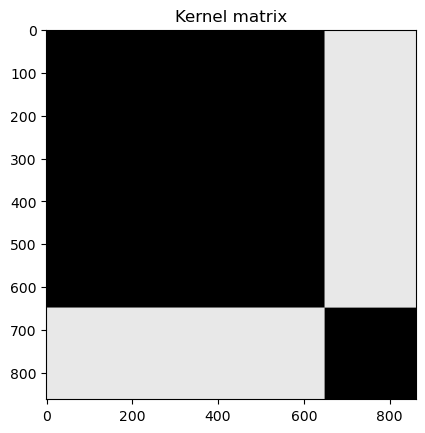

In [147]:
plt.title("Kernel matrix") 
plt.imshow(K, cmap="Greys",vmin=-0.2,vmax=1, )
#plt.savefig("kernelmatrix_QRS.jpg")

In [150]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf = svm.SVC(kernel=brute_kernel)
clf.fit(X_train, y_train)

SVC(kernel=<function brute_kernel at 0x00000222825A6048>)

In [152]:
clf.score(X_test, y_test)

1.0

In [167]:
MAX = 0

for i in range(164):
    for j in range(164):
        for k in range(164):
            tmp = ((primes[i]-1)*(primes[j]-1)*(primes[k]-1)/8)/((primes[i])*(primes[j])*(primes[k]))
            if (tmp > MAX): MAX = tmp

In [168]:
tmp

0.1246242487488784

In [169]:
len(res)

322

In [170]:
v, res = residues(n)

In [172]:
len(res)

322

In [177]:
len(res)*len(coprimes(n))

414736

In [178]:
len(coprimes(n))

1288

In [181]:
len(v)

1363

In [183]:
len(coprimes(n))/len(res)

4.0

In [184]:
p

29

In [185]:
q

47

In [188]:
for i in coprimes(n):
    if(i**2 % n == 1):
        print(i)

1
610
753
1362


In [191]:
np.gcd(610-1, n)

29

In [ ]:
np.gcd(610+1, n)

47

In [215]:
len(primes)

164

In [216]:
MIN = -1
val = 0
for i in primes[:164]:
    if MIN==-1:
        MIN = sp.totient(i-1)/(i-1)
        val = i
    elif sp.totient(i-1)/(i-1)<MIN:
        MIN = sp.totient(i-1)/(i-1)
        val = i

In [217]:
MIN

0.22857142857142856

In [218]:
val

211

In [221]:
primes[-1]

997

In [214]:
fac

NameError: name 'fac' is not defined

In [169]:
sp.factorise(val)

AttributeError: module 'sympy' has no attribute 'factorise'

In [151]:
for i in sp.totient(60)

60